In [2]:
#  Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import warnings
warnings.filterwarnings("ignore")


In [3]:
#  Load Dataset
df = pd.read_csv("swiggy_file.csv")

In [4]:
#  Step 1: Data Cleaning
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Ratings'] = df['Number of Ratings'].str.extract(r'(\d+)')
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'], errors='coerce')
df['Average Price'] = df['Average Price'].str.replace(r'[^\d]', '', regex=True).astype(float)


In [5]:
# Fill missing categorical values with mode
for col in ['Cuisine', 'Offer Name', 'Area']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
# Drop rows with missing essential numeric data
df.dropna(subset=['Rating', 'Number of Ratings', 'Average Price'], inplace=True)


In [7]:
#  Reset Index
df.reset_index(drop=True, inplace=True)

In [8]:
#  Step 2: Basic Info
print("🔹 Dataset Shape:", df.shape)
print("🔹 Columns:", df.columns.tolist())
print("🔹 Missing Values:\n", df.isnull().sum())
print("🔹 Data Types:\n", df.dtypes)

🔹 Dataset Shape: (106938, 10)
🔹 Columns: ['Restaurant Name', 'Cuisine', 'Rating', 'Number of Ratings', 'Average Price', 'Number of Offers', 'Offer Name', 'Area', 'Pure Veg', 'Location']
🔹 Missing Values:
 Restaurant Name      0
Cuisine              0
Rating               0
Number of Ratings    0
Average Price        0
Number of Offers     0
Offer Name           0
Area                 0
Pure Veg             0
Location             0
dtype: int64
🔹 Data Types:
 Restaurant Name       object
Cuisine               object
Rating               float64
Number of Ratings    float64
Average Price        float64
Number of Offers       int64
Offer Name            object
Area                  object
Pure Veg              object
Location              object
dtype: object


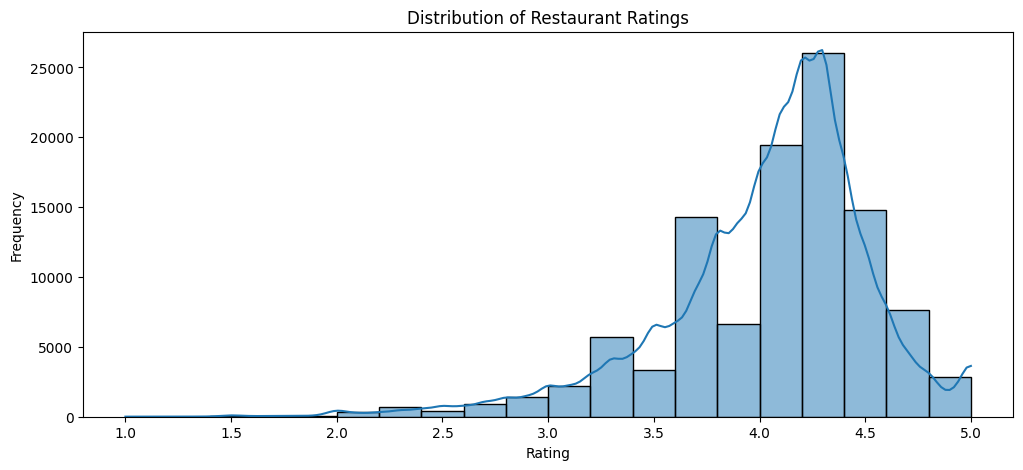

In [9]:
#  Step 3: Visualizations

# Rating Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

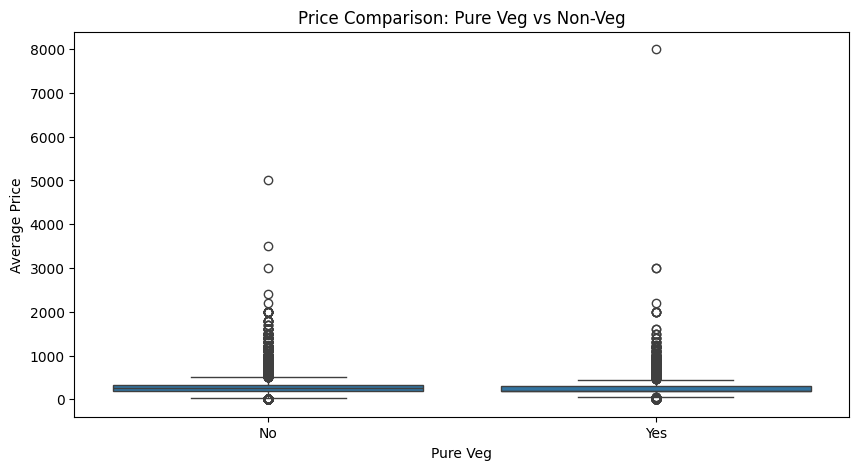

In [10]:
# Boxplot: Pure Veg vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pure Veg', y='Average Price', data=df)
plt.title("Price Comparison: Pure Veg vs Non-Veg")
plt.show()

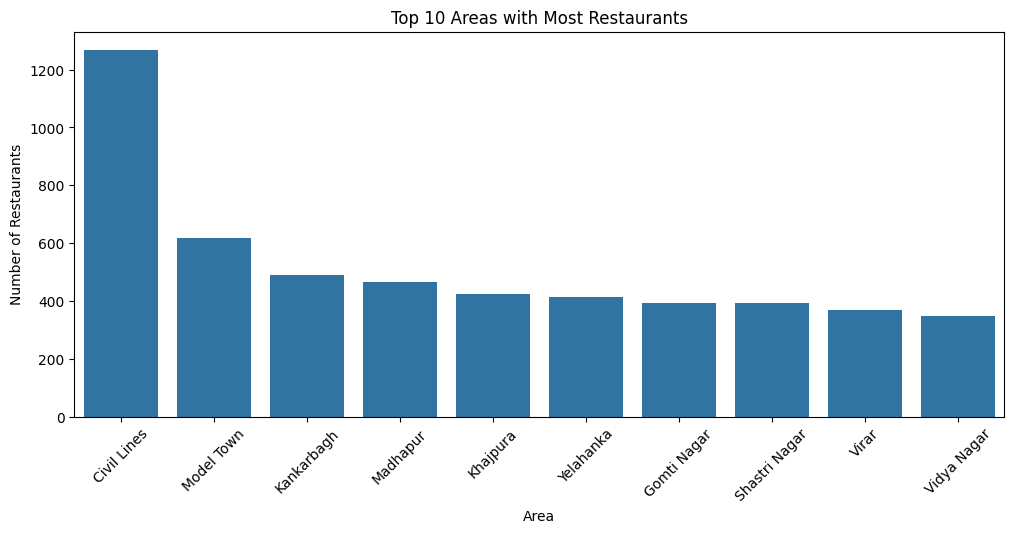

In [11]:
# Top 10 Areas
top_areas = df['Area'].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_areas.index, y=top_areas.values)
plt.title("Top 10 Areas with Most Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

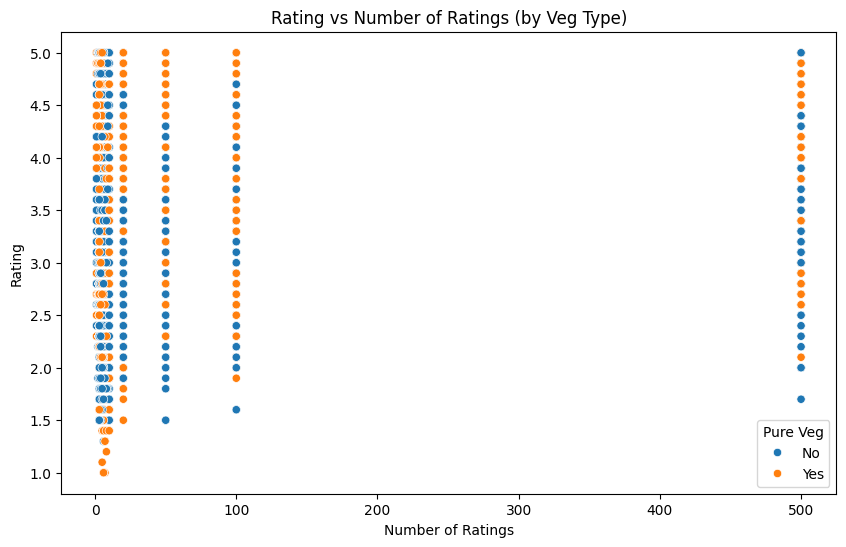

In [12]:
# Rating vs Number of Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Ratings', y='Rating', hue='Pure Veg')
plt.title("Rating vs Number of Ratings (by Veg Type)")
plt.show()

In [13]:
#  Step 4: Hypothesis Testing

# Hypothesis 1: T-Test (Pure Veg vs Non-Veg Price)
veg_price = df[df['Pure Veg'] == 'Yes']['Average Price']
nonveg_price = df[df['Pure Veg'] == 'No']['Average Price']
t_stat, p_val = ttest_ind(veg_price, nonveg_price)
print("\n💡 T-Test Result:")
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_val, 4))
print("Significant difference?" , "✅ Yes" if p_val < 0.05 else "❌ No")

# Hypothesis 2: Chi-Square Test (Area vs Pure Veg)
chi_table = pd.crosstab(df['Area'], df['Pure Veg'])
chi2, chi_p, _, _ = chi2_contingency(chi_table)
print("\n💡 Chi-Square Test Result:")
print("Chi2 Statistic:", round(chi2, 3))
print("P-value:", round(chi_p, 4))
print("Dependency exists?" , "✅ Yes" if chi_p < 0.05 else "❌ No")


💡 T-Test Result:
T-statistic: -63.265
P-value: 0.0
Significant difference? ✅ Yes

💡 Chi-Square Test Result:
Chi2 Statistic: 35607.097
P-value: 0.0
Dependency exists? ✅ Yes


In [14]:
#  Step 5: Final Notes
print("\n✅ EDA Completed on Swiggy Dataset.")


✅ EDA Completed on Swiggy Dataset.
